In [1]:
from sklearn import datasets, decomposition
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lwf = datasets.fetch_lfw_people(min_faces_per_person=100 , resize=0.4)

In [3]:
lwf.keys

<function Bunch.keys>

In [4]:
lwf.data.shape

(1140, 1850)

In [5]:
lwf.images.shape

(1140, 50, 37)

In [6]:
# so this time we have rectangular images

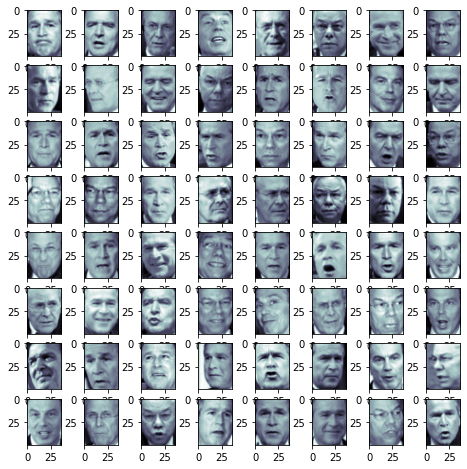

In [7]:
# to plot the natural image

fig = plt.figure(figsize=(8, 8))      
for i in range(64):                    
    ax = fig.add_subplot(8, 8, i+1)    
    ax.imshow(lwf.images[i] , cmap=plt.cm.bone)
plt.show()

# Doing train-test split and transformation

In [8]:
x = lwf.data
y = lwf.target

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, random_state=0)

# choosing optimal value of k

In [10]:
pca = decomposition.PCA()
pca.fit_transform(x_train)
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total <= 0.99:
    current_variance += pca.explained_variance_[k] 
    k=k+1
k

316

# Applying PCA

In [11]:
pca = decomposition.PCA(n_components = k , whiten=True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Reproducing Images

In [12]:
x_approx = pca.inverse_transform(x_train_pca)
x_approx.shape

(855, 1850)

In [13]:
# now to plot the data we need to reshape it to (855, 50, 37)
x_approx = x_approx.reshape((855, 50, 37))

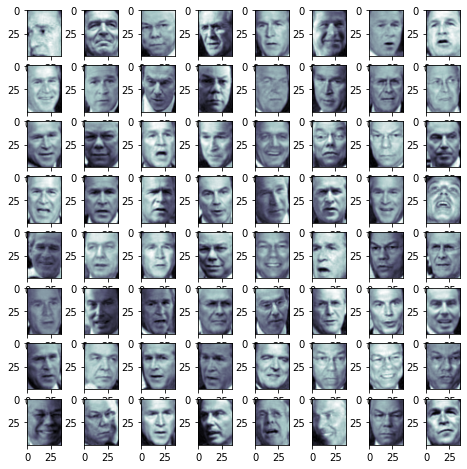

In [14]:
# to plot the natural image

fig = plt.figure(figsize=(8, 8))      
for i in range(64):                    
    ax = fig.add_subplot(8, 8, i+1)    
    ax.imshow(x_approx[i] , cmap=plt.cm.bone)
plt.show()

# Applying Models

In [15]:
alg1 = LogisticRegression()

start = time.time()
alg1.fit(x_train_pca , y_train)
end = time.time()
total_time = end - start

y_pred = alg1.predict(x_test_pca)

print('accuracy : ', alg1.score(x_test_pca , y_test))
print('time : ' , total_time)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

accuracy :  0.856140350877193
time :  0.08576750755310059
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        61
           1       0.84      0.72      0.78        36
           2       0.87      0.96      0.91       122
           3       0.85      0.71      0.77        31
           4       0.90      0.80      0.85        35

    accuracy                           0.86       285
   macro avg       0.86      0.81      0.83       285
weighted avg       0.86      0.86      0.85       285

[[ 51   3   4   1   2]
 [  3  26   5   1   1]
 [  2   1 117   2   0]
 [  4   1   4  22   0]
 [  2   0   5   0  28]]


In [16]:
alg2 = RandomForestClassifier()

start = time.time()
alg2.fit(x_train_pca , y_train)
end = time.time()
total_time = end - start

y_pred = alg2.predict(x_test_pca)

print('accuracy : ', alg2.score(x_test_pca , y_test))
print('time : ' , total_time)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

accuracy :  0.4842105263157895
time :  1.0631895065307617
              precision    recall  f1-score   support

           0       0.67      0.23      0.34        61
           1       1.00      0.03      0.05        36
           2       0.46      0.98      0.62       122
           3       1.00      0.03      0.06        31
           4       1.00      0.09      0.16        35

    accuracy                           0.48       285
   macro avg       0.83      0.27      0.25       285
weighted avg       0.70      0.48      0.37       285

[[ 14   0  47   0   0]
 [  2   1  33   0   0]
 [  3   0 119   0   0]
 [  1   0  29   1   0]
 [  1   0  31   0   3]]
